In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data

The data is fetched directly from Sciensao's spreadsheet, and consolidated with @vdwnico's original values for the beginning of the time-series.

In [26]:
def consolidate(v1, v2):
    v1 = {k:v for k, v in v1}
    v2 = {k:v for k, v in v2}
    v2.update(v1)
    return [(k, v) for k, v in v2.items()]

In [27]:
# Hospitalizations
nico_hosps = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14,
    27), (15, 97), (16, 163), (17, 265), (18, 368), (19, 496), (20,
    649), (21, 842), (22, 1097), (23, 1381), (24, 1644), (25,
    1881), (26, 2138), (27, 2718), (28, 3072), (29, 3644), (30,
    4081), (31, 4474), (32, 4886), (33, 4979), (34, 5210), (35,
    5362), (36, 5497), (37, 5514), (38, 5606), (39, 5744), (40,
    5699), (41, 5597), (42, 5618), (43, 5645), (44, 5419), (45,
    5423), (46, 5536), (47, 5515), (48, 5309), (49, 5161), (50,
    5069), (51, 4871), (52, 4920), (53, 4976), (54, 4765), (55, 
    4527)] # last == April 22
    
df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
sciensano_hosps = df.groupby("DATE")["TOTAL_IN"].sum()   # start on March 15
sciensano_hosps = [(i+17, v) for i, v in enumerate(sciensano_hosps)]
hosps = consolidate(sciensano_hosps, nico_hosps)

In [28]:
# ICUs
nico_icus = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 2), (14,
    15), (15, 24), (16, 33), (17, 53), (18, 79), (19, 100), (20,
    130), (21, 164), (22, 238), (23, 290), (24, 322), (25, 381), (26,
    474), (27, 605), (28, 690), (29, 789), (30, 867), (31, 927), (32,
    1021), (33, 1088), (34, 1144), (35, 1205), (36, 1245), (37,
    1261), (38, 1267), (39, 1260), (40, 1276), (41, 1285), (42,
    1278), (43, 1262), (44, 1232), (45, 1234), (46, 1226), (47,
    1204), (48, 1182), (49, 1140), (50, 1119), (51, 1081), (52,
    1071), (53, 1079), (54, 1020), (55, 993)]  # last == April 22
  
df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
sciensano_icus = df.groupby("DATE")["TOTAL_IN_ICU"].sum()   # start on March 15
sciensano_icus = [(i+17, v) for i, v in enumerate(sciensano_icus)]
icus = consolidate(sciensano_icus, nico_icus)

In [29]:
# Daily deaths
nico_deaths = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 1), (14,
    3), (15, 3), (16, 5), (17, 5), (18, 10), (19, 10), (20, 19), (21,
    25), (22, 27), (23, 36), (24, 46), (25, 75), (26, 69), (27,
    91), (28, 91), (29, 115), (30, 128), (31, 133), (32, 158), (33,
    172), (34, 238), (35, 193), (36, 224), (37, 269), (38, 225), (39,
    267), (40, 299), (41, 321), (42, 275), (43, 323), (44, 283), (45,
    338), (46, 270), (47, 262), (48, 266), (49, 240), (50, 191), (51,
    98), (52, 22), (53, 170), (54, 266), (55, 230)]  # last == April 22

df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="MORT")
sciensano_deaths = df.groupby("DATE")["DEATHS"].sum()   # start on March 10
sciensano_deaths = [(i+12, v) for i, v in enumerate(sciensano_deaths)]
deaths = consolidate(sciensano_deaths, nico_deaths)

In [30]:
deaths[-5:]

[(54, 211), (55, 195), (56, 167), (57, 90), (58, 18)]

In [31]:
# Convert to pandas 
data = pd.DataFrame({
    "n_hospitalized": [i for _ , i in hosps],
    "n_icu": [i for _, i in icus],
    "n_daily_deaths": [i for _, i in deaths],
    "date": pd.date_range(start="2020-02-28", end="2020-04-25")
}, index=range(1, len(hosps)+1))

data["n_deaths"] = data["n_daily_deaths"].cumsum()

In [32]:
data.tail(10)

,n_hospitalized,n_icu,n_daily_deaths,date,n_deaths
49,5181,1140,249,2020-04-16,5598
50,5088,1119,199,2020-04-17,5797
51,4892,1081,200,2020-04-18,5997
52,4940,1071,217,2020-04-19,6214
53,4996,1079,199,2020-04-20,6413
54,4765,1020,211,2020-04-21,6624
55,4527,993,195,2020-04-22,6819
56,4355,970,167,2020-04-23,6986
57,4195,934,90,2020-04-24,7076
58,3959,891,18,2020-04-25,7094


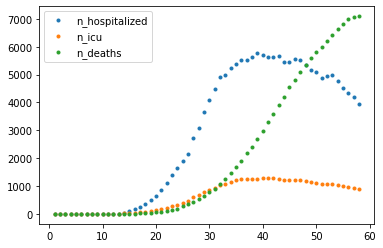

In [33]:
data[["n_hospitalized", "n_icu", "n_deaths"]].plot(style=".")

In [34]:
data.describe()

,n_hospitalized,n_icu,n_daily_deaths,n_deaths
count,58.000000,58.000000,58.000000,58.000000
mean,2910.568966,640.862069,122.310345,2096.706897
std,2371.381174,527.329866,115.861564,2515.102551
min,0.000000,0.000000,0.000000,0.000000
25%,113.500000,26.250000,3.500000,9.250000
50%,3804.500000,828.000000,92.500000,706.500000
75%,5210.250000,1143.000000,223.000000,4125.250000
max,5759.000000,1285.000000,340.000000,7094.000000


# SEIR model

Python re-implementation of Nicolas' original SEIR model.

In [35]:
# Parameters
frac_dh = 2985 / 6490  # deaths in hospitals / total deaths
window = 6          # size of the window for fitting Re's
hh = 0.05           # fraction of hospitalized 
gamma = 1 / 12.4    # inverse recovery time
epsilon = 1 / 5.2   # inverse incubation time 
#dea = 0.5           # fatality rate in icu 
n0 = 11000000       # population size
n0_MRS = 400000     # Population en MR/MRS + personnel soignant

In [49]:
def smoothen(v, n_pts=5):
    box = np.ones(n_pts) / n_pts
    return np.convolve(v, box, mode="same")

def SEIR(r0, i0=3, gg=0.75, dea=0.5, n_futures=0):
    # smoothen the values
    r0 = smoothen(r0)
    
    # make the last r0s identical
    r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
    
    n_days = len(r0)
    
    drea = dea * 1 / 5
    rrea = (1 - dea) * 1 / 20
    n = [n0-n0_MRS]
    i = [i0]
    e = [i[-1] * 37]
    h = [0.0]
    l = [0.0]
    r = [0.0]
    m = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    hospi = 0.0
    
    for day in range(n_days):
        lam = gamma * r0[day]
        
        if day == 14:
            hospi = hh / 7
            
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - gamma * i[-1] - hospi * i[-1]
        dh = hospi * i[-1] - gg * h[-1] / 7 - (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300))
        dl = (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300)) - drea * l[-1] - rrea * l[-1]
        dr = gamma * i[-1] + rrea * l[-1] + gg * h[-1] / 7
        dm = drea * l[-1] 
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        h.append(h[-1] + dh)
        l.append(l[-1] + dl)
        if l[-1] > 1895:
            dm = dm + (l[-1] - 1895)
            l[-1] = 1895
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + h[-1] + l[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(h), np.array(l), np.array(m), np.array(r)

def SEIR_MRS(r0_mrs, n_futures=0):
    # smoothen the R0 values
    r0_mrs = smoothen(r0_mrs)
    
    # make the last r0s identical
    r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))
    
    n_days = len(r0_mrs)
    
    alpha = 0.15 / 10
    lam = gamma * 4.3
    n = [n0_MRS]
    i = [1]
    e = [i[-1]*20]
    r = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    m = [0.0]
    
    for day in range(n_days):
        lam = gamma * r0_mrs[day]
        
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - (gamma + alpha) * i[-1]
        dr = gamma * i[-1]
        dm = alpha * i[-1]
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(m), np.array(r)

# Parameter fit

The procedure is different from Nicolas'. All parameters are fit jointly, instead of using a greedy procedure to fit parameters sequentially. Results are therefore slightly different.

In [50]:
from scipy.optimize import minimize

In [51]:
def pack(r0, r0_rms, i0, gg, dea):
    v = np.zeros(len(r0) + len(r0_rms) + 3)
    v[:len(r0)] = r0
    v[len(r0):len(r0)+len(r0_rms)] = r0_rms
    v[-3] = i0
    v[-2] = gg
    v[-1] = dea
    return v 

def unpack(v):
    return v[:(len(v)-3)//2], v[(len(v)-3)//2:len(v)-3], v[-3], v[-2], v[-1]

In [52]:
from scipy.stats import norm
from scipy.special import gammaln

def normal_logpdf(x, mu, sigma=1):
    return norm.logpdf(x, loc=mu, scale=sigma).sum()

def poisson_logpdf(x, mu, sigma=None):
    return (x * np.log(mu.astype(float) + 1e-10) - mu - gammaln(x.astype(float) + 1e-10)).sum()

def cost(x):
    # parameters
    r0, r0_mrs, i0, gg, dea = unpack(x)
    
    # cost
    c = 0.0
    logpdf = poisson_logpdf 
    
    s, e, i, h, l, m, r = SEIR(r0, i0=i0, gg=gg, dea=dea)
    c -= logpdf(data["n_hospitalized"].values[9:], mu=h[10:]+l[10:])
    c -= logpdf(data["n_icu"].values[9:], mu=l[10:])
    c -= logpdf(frac_dh * data["n_deaths"].values[9:-2], mu=m[10:-2])
    
    # fit on deaths with SEIR_MRS
    s, e, i, m_mrs, r = SEIR_MRS(r0_mrs)
    c -= logpdf(data["n_deaths"].values[:-2], mu=m[1:-2] + m_mrs[1:-2])
    
    # ^ we omit the last two death data points, because not consolidated yet

    return c
 
    
r0 = [4.3] * (len(data) - window)
r0_rms = [4.3] * (len(data) - window)
i0 = 3.0
gg = 0.75
dea = 0.5

bounds = []
for _ in range(len(r0)):
    bounds.append((0.3, 5.0))
for _ in range(len(r0_rms)):
    bounds.append((0.3, 6.3))
bounds.append((1, 50))
bounds.append((0.65, 0.85))
bounds.append((0.4, 0.6))

x0 = pack(r0, r0_rms, i0, gg, dea)

res = minimize(cost, x0=x0, bounds=bounds, options={"maxfun": 100000})

In [54]:
res

      fun: 2574.8966162682673
 hess_inv: <107x107 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.01655598e+00,  5.27220436e+00,  6.51916707e+00,  6.33535819e+00,
        6.23781489e+00,  6.21944309e+00,  6.18706508e+00,  6.14832061e+00,
        6.10370989e+00,  6.05868991e+00,  6.00612111e+00,  5.89875526e+00,
        5.48570824e+00,  4.78307811e+00,  3.90723471e+00,  2.98055056e+00,
        2.15818545e+00,  1.75350579e+00,  1.70207386e+00,  1.79629751e+00,
        1.76296453e+00,  1.51517270e+00,  1.18370735e+00,  1.09885150e+00,
        1.41089913e+00,  2.22839844e+00,  3.40814950e+00,  4.61068339e+00,
        5.41949703e+00,  5.68415999e+00,  5.46924639e+00,  4.93837433e+00,
        4.27462510e+00,  3.65407686e+00,  3.17722879e+00,  2.85781425e+00,
        2.63953552e+00,  2.50047378e+00,  2.42835085e+00,  2.39097062e+00,
        2.38978828e+00,  2.45418050e+00,  2.55349732e+00,  2.61325113e+00,
        2.57132342e+00,  2.47464413e+00,  2.31939339e+00,  2.13285603e+00,

In [55]:
r0, r0_mrs, i0, gg, dea = unpack(res.x)
print(r0)
print(r0_mrs)
print(i0)
print(gg)
print(dea)

[4.99987736 4.99973917 4.99983964 5.         4.99787345 4.99528085
 4.99011634 4.9830845  4.97030412 4.95083634 4.92520804 4.86644747
 3.49961255 1.99545315 1.40898771 1.64966244 3.23619895 4.16309274
 4.8366474  4.83439788 4.7485083  4.22130446 4.86180636 2.14743417
 0.32944805 0.30685528 0.3        0.3        0.3        0.3
 0.3        0.3        0.3        0.34167208 0.61270438 0.32805549
 0.40604344 0.51172854 1.42400434 1.85386816 1.8863118  1.49455551
 0.83977025 0.3        0.3        0.3        0.35456158 0.42161102
 2.09367359 0.3        0.3        0.3       ]
[1.83709486 2.05615153 2.37148957 2.86119047 3.34094295 3.82028393
 4.27955937 4.71192525 5.09637232 5.41560106 5.65923009 5.81551739
 5.87740977 5.85884916 5.75992088 5.59330431 5.37331733 5.11647316
 4.82905149 4.50734097 4.15004887 3.77271427 3.40195752 3.07807425
 2.8399756  2.71783443 2.72737278 2.82549926 2.96534049 3.0837876
 3.12386724 3.05807472 2.84284653 2.4647159  1.90307094 1.15103968
 0.3        0.3        0

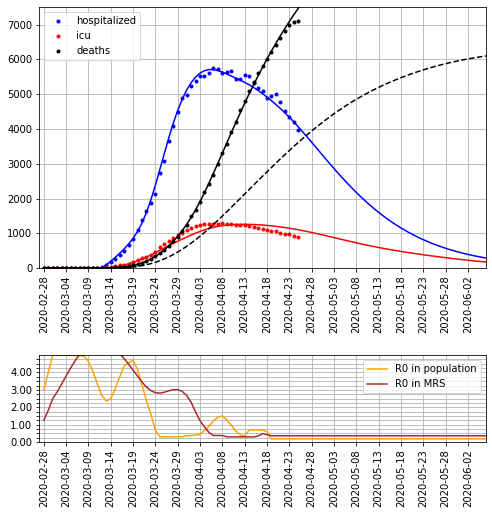

In [56]:
# Plots
r0, r0_mrs, i0, gg, dea = unpack(res.x)
n_futures = 365
s, e, i, h, l, m, r = SEIR(r0, i0=i0, gg=gg, dea=dea, n_futures=n_futures)
_, _, _, m_mrs, _ = SEIR_MRS(r0_mrs, n_futures=n_futures)
n_days = len(data)

fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": (3,1)})

ax[0].plot(range(1, n_days+1 + n_futures), h[1:]+l[1:], c="b")
ax[0].plot(range(1, n_days+1), data["n_hospitalized"].values, ".", c="b", label="hospitalized")
ax[0].plot(range(1, n_days+1 + n_futures), l[1:], c="r")
ax[0].plot(range(1, n_days+1), data["n_icu"].values, ".", c="r", label="icu")
ax[0].plot(range(1, n_days+1 + n_futures), m[1:] + m_mrs[1:], c="k")
ax[0].plot(range(1, n_days+1 + n_futures), m[1:], "--", c="k")
ax[0].plot(range(1, n_days+1), data["n_deaths"].values, ".", c="k", label="deaths")
ax[0].grid()
ax[0].set_ylim(0, 7500)
ax[0].set_xlim(0, 100)
ax[0].set_xticks(np.arange(1, 100, 5))
ax[0].set_xticklabels([d.strftime('%Y-%m-%d') for d in pd.date_range(start="2020-02-28", end="2020-12-31")[:100:5]], rotation=90)
ax[0].legend()

r0 = smoothen(r0)
r0_mrs = smoothen(r0_mrs)
r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))

ax[1].plot(range(1, n_days+1 + n_futures), r0, c="orange", label="R0 in population")
ax[1].plot(range(1, n_days+1 + n_futures), r0_mrs, c="brown", label="R0 in MRS")
ax[1].grid(which="both")
ax[1].set_ylim(0, 5)
ax[1].set_yticks(np.arange(0, 5, step=0.25))

for j, label in enumerate(ax[1].get_yticklabels()):
    if j % 4 != 0:
        label.set_visible(False)
ax[1].set_xlim(0, 100)
ax[1].set_xticks(np.arange(1, 100, 5))
ax[1].set_xticklabels([d.strftime('%Y-%m-%d') for d in pd.date_range(start="2020-02-28", end="2020-12-31")[:100:5]], rotation=90)
ax[1].legend()

plt.subplots_adjust(hspace=0.5)

plt.savefig("plot.png")
plt.show()